# Algoritmi genetici e problema del commesso viaggiatore #
Obiettivo di questa lezione è l'applicazione di un algoritmo genetico alla risoluzione del problema del commesso viaggiatore (TSP, Traveling Salesman Problem). Si tratta di individuare il miglior percorso per minimizzare la distanza da percorrere per visitare $n$ punti, passando per ciascun punto una sola volta. 

L'algoritmo utilizzato è di tipo genetico, cioè "imita" il comportamento della selezione naturale. In particolare, viene generato un certo numero di percorsi iniziali casuali (generazione 0). A questo punto si selezionano due percorsi utilizzando un meccanismo di scelta che rende più probabile la scelta di percorsi più corti (più "adatti", nel linguaggio della biologia evoluzionistica). Questi due percorsi vengono "accoppiati" (operazione di <i>crossover</i>) a darne altri due, "miscela" del loro patrimonio genetico. Sui "figli" viene poi applicato un algoritmo di <i>mutazione</i>, che permette di variare il patrimonio genetico di un individuo singolarmente. Nel caso dell'algoritmo da me impiegato, il crossover ha sempre probabilità 1 (cioè i due elementi selezionati si scambiano sempre il patrimonio genetico). Invece le mutazioni hanno probabilità decrescenti con la loro complessità: una semplice mutazione di scambio è molto più probabile di una più complessa mutazione di scambio a blocchi o simili. 

I problemi che tento di risolvere sono i seguenti: 
<ul>
    <li> 30 città disposte su una circonferenza in maniera casuale </li>
    <li> 30 città disposte all'interno di un quadrato in maniera casuale </li>
</ul>

Il primo caso è di particolare interesse, perché è possibile dare una stima del valore della lunghezza ottimale (quella della circonferenza) e verificare dunque il buon funzionamento dell'algoritmo.

Di seguito riporto i grafici dell'algoritmo arrestato a diverse generazioni.

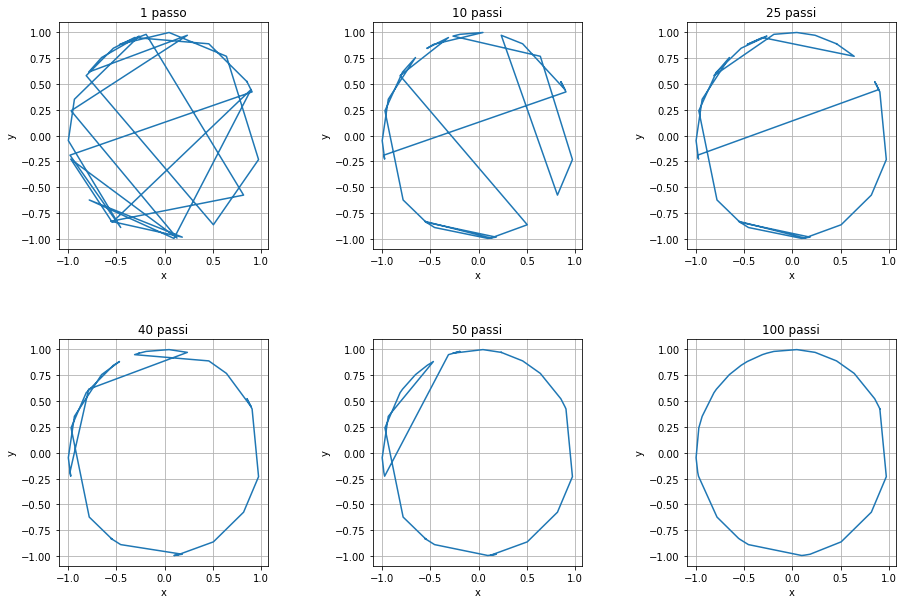

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 10))  # Imposto le misure del grafico.
fig.subplots_adjust(hspace=0.4, wspace=0.5)  # imposto la distanza tra due grafici vicini.

plt.subplot(2,3,6)
plt.title("100 passi")
x,y=np.loadtxt("./Grafici_Per_Jupyter/circonf_movimenti_100.dat", usecols=(0,1), delimiter='   ', unpack='true')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.grid(True)

plt.subplot(2,3,2)
plt.title("10 passi")
x,y=np.loadtxt("./Grafici_Per_Jupyter/circonf_movimenti_10.dat", usecols=(0,1), delimiter='   ', unpack='true')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.grid(True)

plt.subplot(2,3,1)
plt.title("1 passo")
x,y=np.loadtxt("./Grafici_Per_Jupyter/circonf_movimenti_1.dat", usecols=(0,1), delimiter='   ', unpack='true')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.grid(True)

plt.subplot(2,3,3)
plt.title("25 passi")
x,y=np.loadtxt("./Grafici_Per_Jupyter/circonf_movimenti_25.dat", usecols=(0,1), delimiter='   ', unpack='true')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.grid(True)

plt.subplot(2,3,4)
plt.title("40 passi")
x,y=np.loadtxt("./Grafici_Per_Jupyter/circonf_movimenti_40.dat", usecols=(0,1), delimiter='   ', unpack='true')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.grid(True)

plt.subplot(2,3,5)
plt.title("50 passi")
x,y=np.loadtxt("./Grafici_Per_Jupyter/circonf_movimenti_50.dat", usecols=(0,1), delimiter='   ', unpack='true')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.grid(True)

plt.show()

Si vede come al crescere dei passi (cioè delle generazioni) il percorso tende sempre più a quello ottimale. Nei grafici seguenti mostro la lunghezza del percorso migliore al trascorrere delle generazioni e la lunghezza media della metà "migliore" dei percorsi (i 450 percorsi più corti).

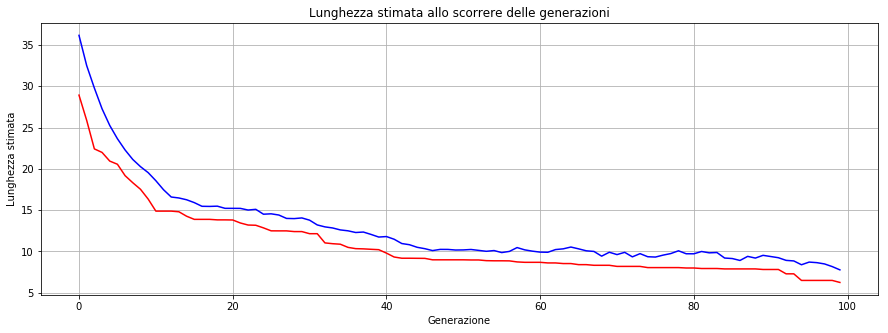

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 5))  # Imposto le misure del grafico.

x1,y1 = np.loadtxt("./Grafici_Per_Jupyter/circonf_migliori.dat", usecols=(0,1), delimiter='   ', unpack='true')
x2,y2 = np.loadtxt("./Grafici_Per_Jupyter/circonf_media_generazione.dat", usecols=(0,1), delimiter='   ', unpack='true')

plt.plot(x1,y1, color='r')
plt.plot(x2,y2, color='b')
plt.grid(True)
plt.xlabel("Generazione")
plt.ylabel("Lunghezza stimata")
plt.title("Lunghezza stimata allo scorrere delle generazioni")

plt.show()

I dati precedenti sono stati ottenuti introducendo una certa forma di elitismo: ad ogni generazione il migliore viene ricopiato automaticamente e senza variazioni alla successiva. Questo nel tentativo di garantire una migliore convergenza. Cosa succede disabilitando tale funzione?

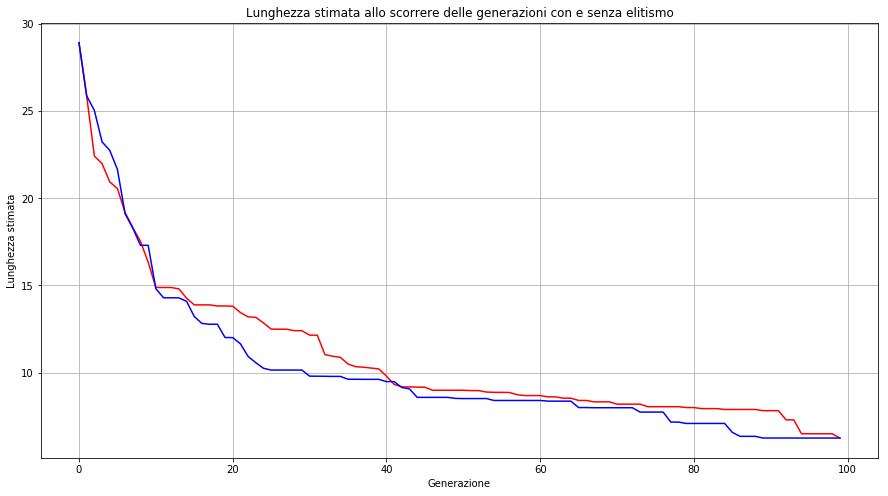

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 8))  # Imposto le misure del grafico.

x1,y1 = np.loadtxt("./Grafici_Per_Jupyter/circonf_migliori.dat", usecols=(0,1), delimiter='   ', unpack='true')
x2,y2 = np.loadtxt("./Grafici_Per_Jupyter/circonf_migliori_senza_elitismo.dat", usecols=(0,1), delimiter='   ', unpack='true')

plt.plot(x1,y1, color='r')
plt.plot(x2,y2, color='b')
plt.grid(True)
plt.xlabel("Generazione")
plt.ylabel("Lunghezza stimata")
plt.title("Lunghezza stimata allo scorrere delle generazioni con e senza elitismo")

plt.show()

Osservando il grafico osservo che l'elitismo (contrariamente a quanto mi sarei aspettato) peggiora le performance dell'algoritmo. Infatti la convergenza è più veloce in assenza di elitismo. Questo è probabilmente dovuto al fatto che l'algoritmo genetico (a causa specialmente della probabilità unitaria di crossover) è estremamente ergodico, quindi un intervento esterno come quello dell'elitismo rallenta la convergenza.

Passo ora a considerare quanto succede con un insieme di "città" da raggiungere distribuito casualmente all'interno di un quadrato. Riporto qui una serie di diagrammi al variare del numero di generazioni.

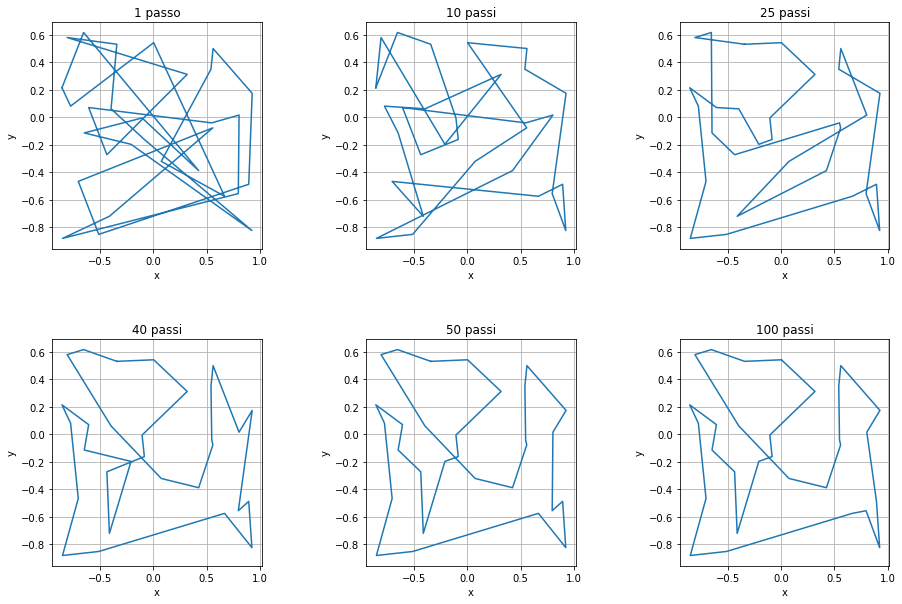

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 10))  # Imposto le misure del grafico.
fig.subplots_adjust(hspace=0.4, wspace=0.5)  # imposto la distanza tra due grafici vicini.

plt.subplot(2,3,6)
plt.title("100 passi")
x,y=np.loadtxt("./Grafici_Per_Jupyter/quadrato_movimenti_100.dat", usecols=(0,1), delimiter='   ', unpack='true')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.grid(True)

plt.subplot(2,3,2)
plt.title("10 passi")
x,y=np.loadtxt("./Grafici_Per_Jupyter/quadrato_movimenti_10.dat", usecols=(0,1), delimiter='   ', unpack='true')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.grid(True)

plt.subplot(2,3,1)
plt.title("1 passo")
x,y=np.loadtxt("./Grafici_Per_Jupyter/quadrato_movimenti_1.dat", usecols=(0,1), delimiter='   ', unpack='true')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.grid(True)

plt.subplot(2,3,3)
plt.title("25 passi")
x,y=np.loadtxt("./Grafici_Per_Jupyter/quadrato_movimenti_25.dat", usecols=(0,1), delimiter='   ', unpack='true')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.grid(True)

plt.subplot(2,3,4)
plt.title("40 passi")
x,y=np.loadtxt("./Grafici_Per_Jupyter/quadrato_movimenti_40.dat", usecols=(0,1), delimiter='   ', unpack='true')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.grid(True)

plt.subplot(2,3,5)
plt.title("50 passi")
x,y=np.loadtxt("./Grafici_Per_Jupyter/quadrato_movimenti_50.dat", usecols=(0,1), delimiter='   ', unpack='true')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.grid(True)

plt.show()

In questo caso è evidente che la situazione migliora significativamente con lo scorrere delle generazioni, ma viene molto più difficile stimare se quello individuato sia effettivamente il minimo assoluto o se l'algoritmo si sia invece bloccato in un minimo locale. Grafico qui anche la situazione delle lunghezze:

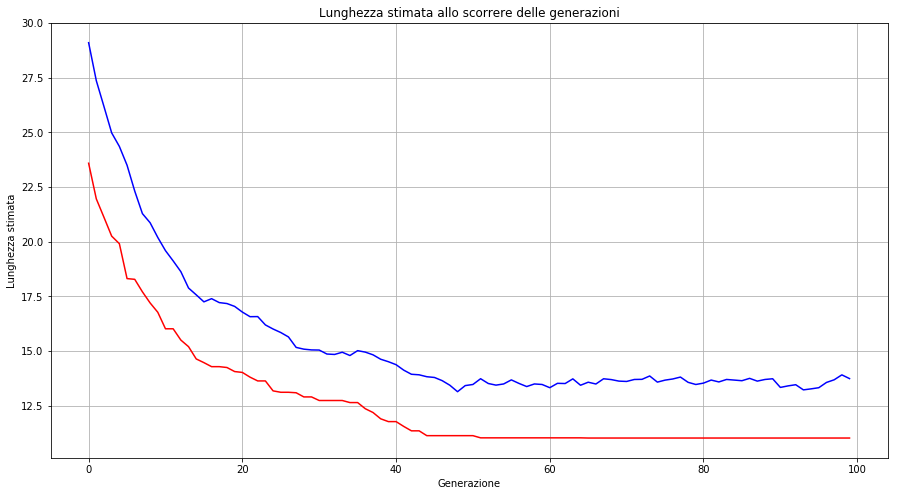

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 8))  # Imposto le misure del grafico.

x1,y1 = np.loadtxt("./Grafici_Per_Jupyter/quadrato_migliori.dat", usecols=(0,1), delimiter='   ', unpack='true')
x2,y2 = np.loadtxt("./Grafici_Per_Jupyter/quadrato_media_generazione.dat", usecols=(0,1), delimiter='   ', unpack='true')

plt.plot(x1,y1, color='r')
plt.plot(x2,y2, color='b')
plt.grid(True)
plt.xlabel("Generazione")
plt.ylabel("Lunghezza stimata")
plt.title("Lunghezza stimata allo scorrere delle generazioni")

plt.show()

Cosa succede in questo caso se rimuovo l'elitismo?

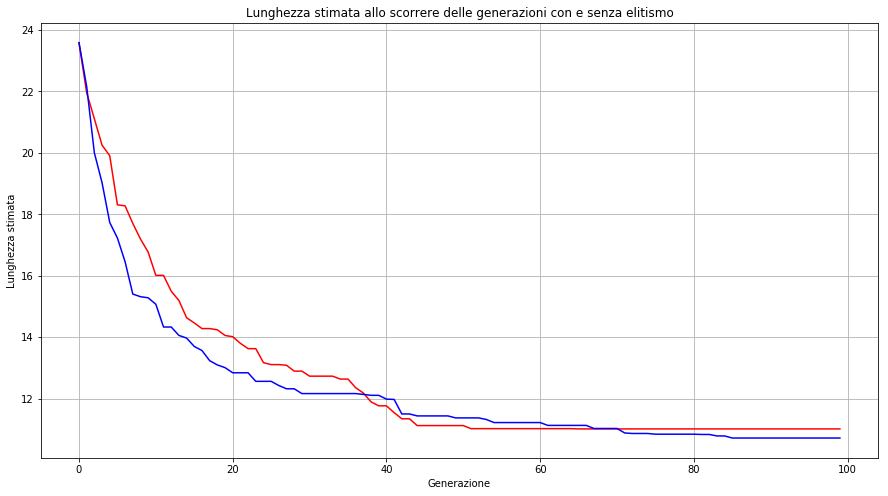

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 8))  # Imposto le misure del grafico.

x1,y1 = np.loadtxt("./Grafici_Per_Jupyter/quadrato_migliori.dat", usecols=(0,1), delimiter='   ', unpack='true')
x2,y2 = np.loadtxt("./Grafici_Per_Jupyter/quadrato_migliori_senza_elitismo.dat", usecols=(0,1), delimiter='   ', unpack='true')

plt.plot(x1,y1, color='r')
plt.plot(x2,y2, color='b')
plt.grid(True)
plt.xlabel("Generazione")
plt.ylabel("Lunghezza stimata")
plt.title("Lunghezza stimata allo scorrere delle generazioni con e senza elitismo")

plt.show()

In questo caso addirittura l'elitismo introduce una stabilizzazione dell'algoritmo ad un valore più alto del minimo. Confronto i due percorsi:

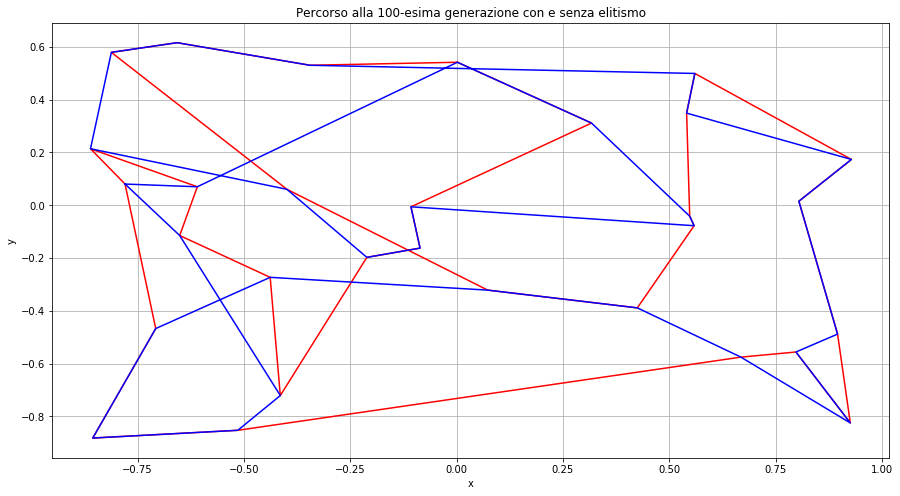

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 8))  # Imposto le misure del grafico.

x1,y1 = np.loadtxt("./Grafici_Per_Jupyter/quadrato_movimenti_100.dat", usecols=(0,1), delimiter='   ', unpack='true')
x2,y2 = np.loadtxt("./Grafici_Per_Jupyter/quadrato_movimenti_100_senza_elitismo.dat", usecols=(0,1), delimiter='   ', unpack='true')

plt.plot(x1,y1, color='r')
plt.plot(x2,y2, color='b')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Percorso alla 100-esima generazione con e senza elitismo")

plt.show()

Il fatto che i due percorsi siano così differenti ci dice che non stiamo effettivamente trovando un minimo assoluto! Occorrerebbe riuscire a rendere maggiormente ergodico il sistema. Provo a farlo inserendo un nuovo tipo di mutazione, cioè la permutazione a blocchi. Così la situazione dopo 100 generazioni diventa:

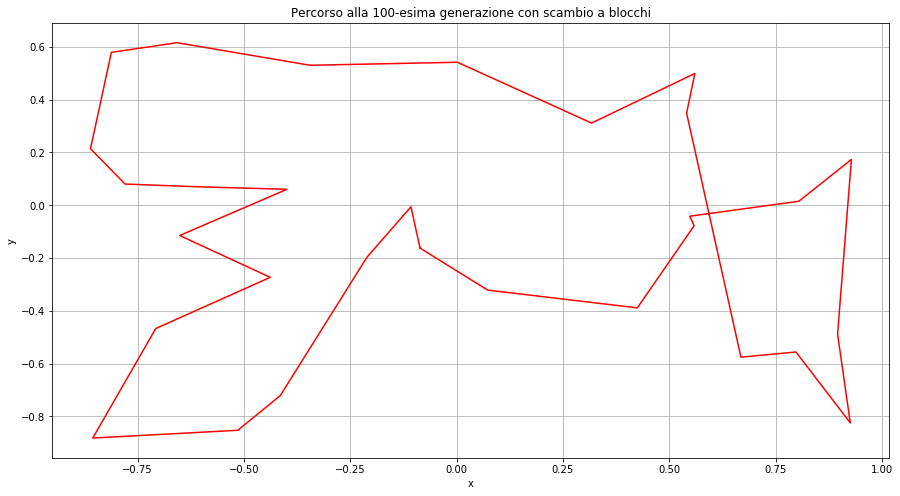

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 8))  # Imposto le misure del grafico.

x1,y1 = np.loadtxt("./Grafici_Per_Jupyter/quadrato_movimenti_100_con_scambio_blocchi.dat", usecols=(0,1), delimiter='   ', unpack='true')
#x2,y2 = np.loadtxt("./Grafici_Per_Jupyter/quadrato_movimenti_100_senza_elitismo.dat", usecols=(0,1), delimiter='   ', unpack='true')

plt.plot(x1,y1, color='r')
#plt.plot(x2,y2, color='b')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Percorso alla 100-esima generazione con scambio a blocchi")

plt.show()

Il diagramma ottenuto è in questo caso:

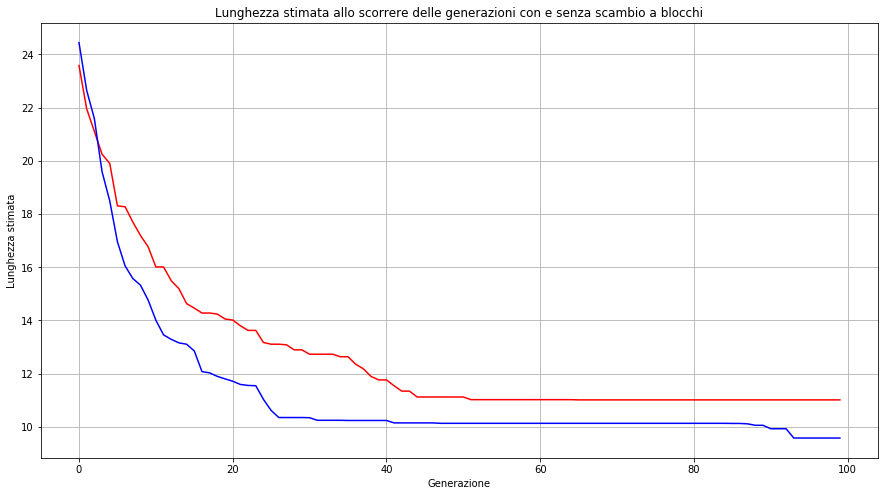

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15, 8))  # Imposto le misure del grafico.

x1,y1 = np.loadtxt("./Grafici_Per_Jupyter/quadrato_migliori.dat", usecols=(0,1), delimiter='   ', unpack='true')
x2,y2 = np.loadtxt("./Grafici_Per_Jupyter/quadrato_migliori_con_scambio_blocchi.dat", usecols=(0,1), delimiter='   ', unpack='true')

plt.plot(x1,y1, color='r')
plt.plot(x2,y2, color='b')
plt.grid(True)
plt.xlabel("Generazione")
plt.ylabel("Lunghezza stimata")
plt.title("Lunghezza stimata allo scorrere delle generazioni con e senza scambio a blocchi")

plt.show()

Ovviamente anche il questo caso non siamo certi del fatto che il percorso selezionato sia davvero il migliore, ma è una miglior stima di quello ottenuto precedentemente. Aumentare il numero delle generazioni (ho provato fino a 5000) non riesce a far convergere la lunghezza del percorso ad un valore inferiore. Ho tentato anche di aumentare significativamente le probabilità di mutazione in maniera tale da provare a dare una "scossa" al sistema se si fosse arrestato in un minimo locale, senza ottenere però altro risultato che peggiorare la stabilità dell'algoritmo (una elevata probabilità di mutazione tende a "buttare via" molto facilmente soluzioni buone in favore di altre meno buone).